# **False Position and Secant method**<br>

The False Position method is one of the methods of finding roots of a non-linear function. Similar to the Bisection method, it falls under the category of **Bracketing methods** since the initial boundary guesses, x<sub>l</sub> and x<sub>u</sub>, must bracket the actual root. And the assumption here is that the function is real continuous, otherwise the False position method wouldn't work. The main difference between the Bisection method and False position method is that it takes advantage of the fact that one of the boundary values, either x<sub>l</sub> or x<sub>u</sub>, would have their functional value be closer to the zero of the function, and this would result in the new estimation x<sub>r</sub> be closer to one of the bracketing values than the mid-point x<sub>m</sub>.

In today's lab, we will be implementing the False position method in python. Just like in the previous lab for Bisection method, we will be considering the function f(x) as an array of coefficients, for instance if we want to have f(x) = x<sup>3</sup>+x-2, then in python we will create an array as follows:


In [ ]:
f = [0.5,0,-2,5]

Note that your implementation should be able to handle the array f of any size,which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array f given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array f and a point x as input and evaluate the value of the function at that point x using a loop and return that value. This function will be called in the other function that you will implement, which is as follows:
```
falseposition(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array f and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most epsilon (%).

##Task 1
Implement the function for False position method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly. For the function given above, there is only one real root and it is 1.

In [ ]:
def func(f, x):
    result = 0
    for i in range(len(f)-1, -1, -1):
      result = result + f[len(f)-i-1]*pow(x,i)
    return result

print(func(f,2))

5.0


In [ ]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    result = 0
    for i in range(len(f)-1, -1, -1):
      result = result + f[len(f)-i-1]*pow(x,i)
    return result




  
#-2.761
#Complete the following function

def falseposition(f, xl, xu, epsilon):
  #write your implementation here
  error = 80
  i = 1
  errorList = []
  while(1):
    xrNew = ((xu*func(f,xl)) - (xl*func(f,xu)))/(func(f,xl)-func(f,xu))
    if (func(f,xl)*func(f,xrNew))<0:
      xu = xrNew
    elif (func(f,xl)*func(f,xrNew))>0:
      xl = xrNew
    else:
      xrNew = xrNew
      return xrNew
    if(i>1):
        error = ((xrNew - xr)/xrNew)*100
        error = abs(error)
        errorList.append(error)
        if error < epsilon :
          break
    xr = xrNew
    i = i+1
    print(xrNew, " ", error)
  print("The root is : ",xrNew)
  return errorList

#Write a driver code here for calling the function and testing it

errorList = falseposition(f,-5, 5, 0.01)

-0.47619047619047616   80
-0.9758908846412448   51.20453693288339
-1.4594273121605108   33.131929455496284
-1.8777796634963981   22.279096928599248
-2.198875817163798   14.602741599185132
-2.4205414033367094   9.157686204720395
-2.561709769989399   5.510708836203318
-2.646820200642128   3.2155728081598127
-2.6963977433969757   1.838658368419665
-2.7246898424070976   1.0383603509575063
-2.740644219045064   0.5821396490320606
-2.7495805127792186   0.3250057124212737
-2.754566856715774   0.18102098064523042
-2.7573432588301072   0.10069120358671829
-2.758887328517011   0.05596711655976828
-2.759745480963912   0.031095347481144325
-2.760222243832227   0.017272626122061086
The root is :  -2.760487064409899


In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the matplotlib library.

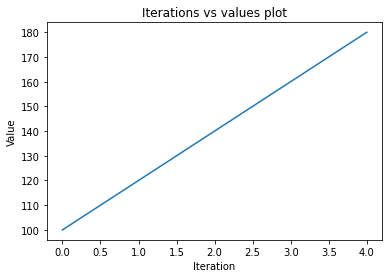

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

## Task 2
Generate a plot of **iteration vs relative approx error (%)** for the False Position method function you implemented earlier.

[51.20453693288339, 33.131929455496284, 22.279096928599248, 14.602741599185132, 9.157686204720395, 5.510708836203318, 3.2155728081598127, 1.838658368419665, 1.0383603509575063, 0.5821396490320606, 0.3250057124212737, 0.18102098064523042, 0.10069120358671829, 0.05596711655976828, 0.031095347481144325, 0.017272626122061086, 0.009593255519517736]


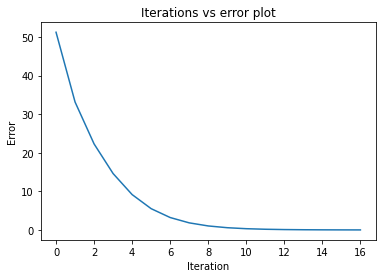

In [ ]:
# Write your code for generating the graph here

import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20
print(errorList)
plt.plot(errorList)
plt.title("Iterations vs error plot")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()



# **Secant method**
The Secant method is another method of finding roots of a nonlinear function. Unlike the Bisection and False position method, it falls under the category of **Open methods** due to the fact that we only need two initial guesses that do not have to bracket the actual root. Secant method works by approximating the derivative that is used in **Newton Raphson method**.

## Task 3
Implement the Secant method for the above function and write a script for testing its implementation. The actual root is 1, and you can take the initial guesses for the secant as 2 and 2.2.

In [ ]:
Xi = 2
Xi_prev = 3
epsilon = 0.01

# Complete the following function
def secant(f, Xi, Xi_prev, epsilon):
  # write your implementation here
  error = 100
  errorLi = []
  while(1):
    if func(f,Xi)==func(f,Xi_prev):
      return func(f,Xi)
    xNew = Xi - ((func(f,Xi)*(Xi-Xi_prev))/(func(f,Xi)-func(f,Xi_prev)))
    error = ((xNew - Xi)/xNew)*100
    Xi_prev = Xi
    Xi = xNew
    error = abs(error)
    errorLi.append(error)
    print(Xi, "  ",error)
    if error < epsilon :
            break  
  print("The root is :",Xi)
  return errorLi
  

# Write a script here for calling the above function
error = secant(f, Xi, Xi_prev, epsilon)

1.3333333333333335    49.999999999999986
-0.24999999999999956    633.3333333333344
4.15598885793872    106.01541554959786
-1.1433475728602582    463.4930406632062
-2.4741465882134106    53.788204049547716
-3.2334556819916025    23.482897817560495
-2.7050556578995906    19.533794898042935
-2.7506366038152263    1.6571053352672414
-2.7610724045985626    0.3779618660472455
-2.7608166925870914    0.00926218724183425
The root is : -2.7608166925870914


## Task 4
Plot the **iteration vs absolute relative approximate error (%)** curves for both False position method and Secant method in the same graph and see which one converges faster.

[49.999999999999986, 633.3333333333344, 106.01541554959786, 463.4930406632062, 53.788204049547716, 23.482897817560495, 19.533794898042935, 1.6571053352672414, 0.3779618660472455, 0.00926218724183425]


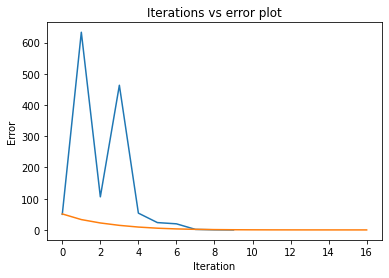

In [ ]:
# Write your code for generating the graph here

import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20
print(error)
plt.plot(error)
plt.title("Iterations vs error plot")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(errorList)
plt.show()

